## Capstone Project: Opening a traditional dining restaurant in New Orleans by exploring different neighborhoods¶

#### By: Sara Rauf


#### Import Necessary Libraries and Packages

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os


import requests # library to handle requests
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#import k-means from clustering stage
from sklearn.cluster import KMeans
! pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 79 kB 8.7 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=c142ddbe1c4dd700d6d3f1eaf937f714a91714de1eaa341889933fdd94eb59b4
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


Define Foursquare credentials and versions

In [2]:
CLIENT_ID = 'YZFOD0RMHGDQCXXH54A5VDWNBWAOZFKZ4O0CMZLGRFNPLDXM' # your Foursquare ID
CLIENT_SECRET = '2RTFKYNMMK43Y2LDMU2XEMLYOESSOM3N5AYVY3CJCC5UTY2S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: YZFOD0RMHGDQCXXH54A5VDWNBWAOZFKZ4O0CMZLGRFNPLDXM
CLIENT_SECRET:2RTFKYNMMK43Y2LDMU2XEMLYOESSOM3N5AYVY3CJCC5UTY2S


#### Download data and explore datasets

In [4]:
url = "https://www.datacenterresearch.org/data-resources/population-by-parish/" #Set site URL

In [5]:
df1 = requests.get(url) # Make a GET request to fetch the raw HTML content

In [6]:
soup = BeautifulSoup(df1.text, 'html.parser') # Parse HTML code for the entire site

In [7]:
parish = soup.find_all("table") # Find the table tag

In [8]:
len(parish) # Find number of tables on the site

1

In [9]:
body = parish[0].find_all("tr") 

In [10]:
body

[<tr>
 <td></td>
 <td>Jefferson</td>
 <td>Orleans</td>
 <td>Plaquemines</td>
 <td>St. Bernard</td>
 <td>St. Charles</td>
 <td>St. James</td>
 <td>St. John</td>
 <td>St. Tammany</td>
 <td><strong><em>Metro Area total</em></strong></td>
 </tr>,
 <tr>
 <td>Census 1980</td>
 <td>454,592</td>
 <td>557,515</td>
 <td>26,049</td>
 <td>64,097</td>
 <td>37,259</td>
 <td>21,495</td>
 <td>31,924</td>
 <td>110,869</td>
 <td><strong><em>1,303,800</em></strong></td>
 </tr>,
 <tr bgcolor="">
 <td>Census 1990</td>
 <td>448,306</td>
 <td>496,938</td>
 <td>25,575</td>
 <td>66,631</td>
 <td>42,437</td>
 <td>20,879</td>
 <td>39,996</td>
 <td>144,508</td>
 <td><strong><em>1,285,270</em></strong></td>
 </tr>,
 <tr>
 <td>Census 2000</td>
 <td>455,466</td>
 <td>484,674</td>
 <td>26,757</td>
 <td>67,229</td>
 <td>48,072</td>
 <td>21,216</td>
 <td>43,044</td>
 <td>191,268</td>
 <td><strong><em>1,337,726</em></strong></td>
 </tr>,
 <tr>
 <td>Census 2010</td>
 <td>432,552</td>
 <td>343,829</td>
 <td>23,042</td>
 <

In [11]:
import re
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [12]:
all_rows

[['',
  'Jefferson',
  'Orleans',
  'Plaquemines',
  'St. Bernard',
  'St. Charles',
  'St. James',
  'St. John',
  'St. Tammany',
  'Metro Area total'],
 ['Census 1980',
  '454592',
  '557515',
  '26049',
  '64097',
  '37259',
  '21495',
  '31924',
  '110869',
  '1303800'],
 ['Census 1990',
  '448306',
  '496938',
  '25575',
  '66631',
  '42437',
  '20879',
  '39996',
  '144508',
  '1285270'],
 ['Census 2000',
  '455466',
  '484674',
  '26757',
  '67229',
  '48072',
  '21216',
  '43044',
  '191268',
  '1337726'],
 ['Census 2010',
  '432552',
  '343829',
  '23042',
  '35897',
  '52780',
  '22102',
  '45924',
  '233740',
  '1189866'],
 ['Estimate 2011*',
  '434089',
  '360735',
  '23582',
  '39516',
  '52390',
  '21784',
  '45066',
  '236846',
  '1214008'],
 ['Estimate 2012*',
  '433954',
  '369787',
  '23826',
  '41483',
  '52420',
  '21634',
  '44719',
  '239064',
  '1226887'],
 ['Estimate 2013*',
  '434264',
  '378637',
  '23509',
  '43430',
  '52614',
  '21607',
  '43570',
  '241953

In [13]:
data = pd.DataFrame(all_rows)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,,Jefferson,Orleans,Plaquemines,St. Bernard,St. Charles,St. James,St. John,St. Tammany,Metro Area total
1,Census 1980,454592,557515,26049,64097,37259,21495,31924,110869,1303800
2,Census 1990,448306,496938,25575,66631,42437,20879,39996,144508,1285270
3,Census 2000,455466,484674,26757,67229,48072,21216,43044,191268,1337726
4,Census 2010,432552,343829,23042,35897,52780,22102,45924,233740,1189866


In [15]:
#data1 = pd.DataFrame(data=all_rows,columns=headings)
header_row = 0

data.columns = data.iloc[header_row] # Get rid of the first row which contained the table headers from the webpage

In [16]:
data = data.drop(header_row)

In [17]:
data.columns= ['Census', 'Jefferson', 'Orleans', 'Plaquemines', 'St. Bernard', 'St. Charles', 'St. James', 'St. John', 'St. Tammany', 'Metro Area total']
data

,Census,Jefferson,Orleans,Plaquemines,St. Bernard,St. Charles,St. James,St. John,St. Tammany,Metro Area total
1,Census 1980,454592,557515,26049,64097,37259,21495,31924,110869,1303800
2,Census 1990,448306,496938,25575,66631,42437,20879,39996,144508,1285270
3,Census 2000,455466,484674,26757,67229,48072,21216,43044,191268,1337726
4,Census 2010,432552,343829,23042,35897,52780,22102,45924,233740,1189866
5,Estimate 2011*,434089,360735,23582,39516,52390,21784,45066,236846,1214008
6,Estimate 2012*,433954,369787,23826,41483,52420,21634,44719,239064,1226887
7,Estimate 2013*,434264,378637,23509,43430,52614,21607,43570,241953,1239584
8,Estimate 2014*,434078,383940,23304,44439,52678,21515,43714,245237,1248905
9,Estimate 2015*,435175,389742,23437,45421,52572,21481,43523,248930,1260281
10,Estimate 2016*,436572,391843,23323,45777,52796,21433,43401,252468,1267613


In [18]:
data.set_index('Census')

,Jefferson,Orleans,Plaquemines,St. Bernard,St. Charles,St. James,St. John,St. Tammany,Metro Area total
Census,,,,,,,,,
Census 1980,454592,557515,26049,64097,37259,21495,31924,110869,1303800
Census 1990,448306,496938,25575,66631,42437,20879,39996,144508,1285270
Census 2000,455466,484674,26757,67229,48072,21216,43044,191268,1337726
Census 2010,432552,343829,23042,35897,52780,22102,45924,233740,1189866
Estimate 2011*,434089,360735,23582,39516,52390,21784,45066,236846,1214008
Estimate 2012*,433954,369787,23826,41483,52420,21634,44719,239064,1226887
Estimate 2013*,434264,378637,23509,43430,52614,21607,43570,241953,1239584
Estimate 2014*,434078,383940,23304,44439,52678,21515,43714,245237,1248905
Estimate 2015*,435175,389742,23437,45421,52572,21481,43523,248930,1260281


We will only keep the latest year for which the census data was collected and remove all other unnecessary rows

In [19]:
del data['Census']
del data['Metro Area total']

data.drop([1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
data

,Jefferson,Orleans,Plaquemines,St. Bernard,St. Charles,St. James,St. John,St. Tammany
13,432493,390144,23197,47244,53100,21096,42837,260419


Let's plot a bar chart to see which parish has the highest population according to census

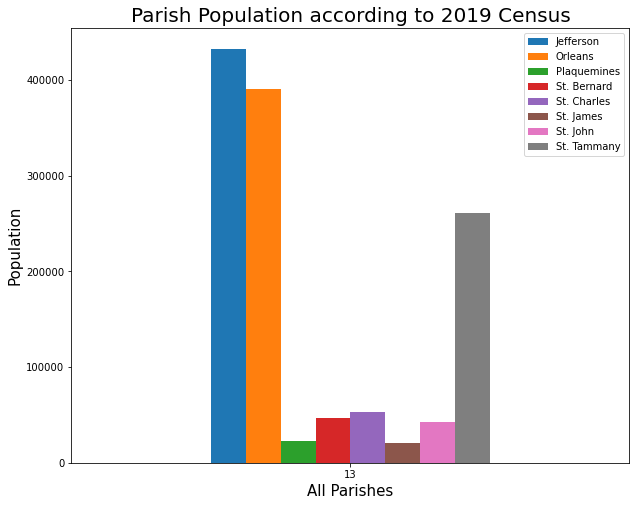

In [306]:
data=data.astype(float)
clr = "green"
parish_list = ['Jefferson', 'Orleans', 'Plaquemines', 'St. Bernard', 'St. Charles', 'St. James', 'St. John', 'St. Tammany']

data.groupby('Jefferson')[parish_list].plot.bar(figsize=(10,8))
plt.title('Parish Population according to 2019 Census', fontsize = 20)
plt.xlabel('All Parishes', fontsize = 15)
plt.ylabel('Population',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

Clearly, in the New Orleans Metro Area, Jefferson and Orleans Parishes are the most populated. 

In [21]:
url2 = 'https://www.zipdatamaps.com/zipcodes-new-orleans-la'

In [22]:
df_list = pd.read_html(url2)

In [23]:
len(df_list)

19

In [24]:
df_list[0]

List of Zipcodes in New Orleans, Louisiana                           \
                                     ZIP Code ZIP Code Name Population   
0                                     70112.0   New Orleans     3655.0   
1                                     70113.0   New Orleans     7025.0   
2                                     70114.0   New Orleans    22870.0   
3                                     70115.0   New Orleans    31695.0   
4                                     70116.0   New Orleans    11507.0   
5                                     70117.0   New Orleans    23389.0   
6                                         NaN           NaN        NaN   
7                                     70118.0   New Orleans    33008.0   
8                                     70119.0   New Orleans    36228.0   
9                                     70122.0   New Orleans    28564.0   
10                                    70124.0   New Orleans    16824.0   
11                                    70125.0   New Orleans    14479.0   
12                                        NaN           NaN        NaN   
13                                    70126.0   New Orleans    23958.0   
14                                    70127.0   New Orleans    20471.0   
15                                    70128.0   New Orleans    17113.0   
16                                    70129.0   New Orleans     9064.0   
17                                    70130.0   New Orleans    14064.0   
18                                        NaN           NaN        NaN   
19                                    70131.0   New Orleans    29915.0   
20                                    70148.0   New Orleans        3.0   

                
          Type  
0   Non-Unique  
1   Non-Unique  
2   Non-Unique  
3   Non-Unique  
4   Non-Unique  
5   Non-Unique  
6          NaN  
7   Non-Unique  
8   Non-Unique  
9   Non-Unique  
10  Non-Unique  
11  Non-Unique  
12         NaN  
13  Non-Unique  
14  Non-Unique  
15  Non-Unique  
16  Non-Unique  
17  Non-Unique  
18         NaN  
19  Non-Unique  
20  Non-Unique

In [25]:
df_list[0]= df_list[0].dropna()

In [26]:
from pandas import DataFrame

df_zipcode = pd.DataFrame(df_list[0])

In [27]:
df_zipcode

List of Zipcodes in New Orleans, Louisiana                           \
                                     ZIP Code ZIP Code Name Population   
0                                     70112.0   New Orleans     3655.0   
1                                     70113.0   New Orleans     7025.0   
2                                     70114.0   New Orleans    22870.0   
3                                     70115.0   New Orleans    31695.0   
4                                     70116.0   New Orleans    11507.0   
5                                     70117.0   New Orleans    23389.0   
7                                     70118.0   New Orleans    33008.0   
8                                     70119.0   New Orleans    36228.0   
9                                     70122.0   New Orleans    28564.0   
10                                    70124.0   New Orleans    16824.0   
11                                    70125.0   New Orleans    14479.0   
13                                    70126.0   New Orleans    23958.0   
14                                    70127.0   New Orleans    20471.0   
15                                    70128.0   New Orleans    17113.0   
16                                    70129.0   New Orleans     9064.0   
17                                    70130.0   New Orleans    14064.0   
19                                    70131.0   New Orleans    29915.0   
20                                    70148.0   New Orleans        3.0   

                
          Type  
0   Non-Unique  
1   Non-Unique  
2   Non-Unique  
3   Non-Unique  
4   Non-Unique  
5   Non-Unique  
7   Non-Unique  
8   Non-Unique  
9   Non-Unique  
10  Non-Unique  
11  Non-Unique  
13  Non-Unique  
14  Non-Unique  
15  Non-Unique  
16  Non-Unique  
17  Non-Unique  
19  Non-Unique  
20  Non-Unique

In [28]:
for col in df_zipcode.columns: 
    print(col) 

('List of Zipcodes in New Orleans, Louisiana', 'ZIP Code')
('List of Zipcodes in New Orleans, Louisiana', 'ZIP Code Name')
('List of Zipcodes in New Orleans, Louisiana', 'Population')
('List of Zipcodes in New Orleans, Louisiana', 'Type')


In [29]:
del df_zipcode[('List of Zipcodes in New Orleans, Louisiana', 'ZIP Code Name')]

In [30]:
del df_zipcode[('List of Zipcodes in New Orleans, Louisiana', 'Type')]
df_zipcode

List of Zipcodes in New Orleans, Louisiana           
                                     ZIP Code Population
0                                     70112.0     3655.0
1                                     70113.0     7025.0
2                                     70114.0    22870.0
3                                     70115.0    31695.0
4                                     70116.0    11507.0
5                                     70117.0    23389.0
7                                     70118.0    33008.0
8                                     70119.0    36228.0
9                                     70122.0    28564.0
10                                    70124.0    16824.0
11                                    70125.0    14479.0
13                                    70126.0    23958.0
14                                    70127.0    20471.0
15                                    70128.0    17113.0
16                                    70129.0     9064.0
17                                    70130.0    14064.0
19                                    70131.0    29915.0
20                                    70148.0        3.0

In [307]:
pd.set_option('precision', 0)
df_zipcode

List of Zipcodes in New Orleans, Louisiana           
                                          Zip Population
0                                       70112       3655
1                                       70113       7025
2                                       70114      22870
3                                       70115      31695
4                                       70116      11507
5                                       70117      23389
7                                       70118      33008
8                                       70119      36228
9                                       70122      28564
10                                      70124      16824
11                                      70125      14479
13                                      70126      23958
14                                      70127      20471
15                                      70128      17113
16                                      70129       9064
17                                      70130      14064
19                                      70131      29915
20                                      70148          3

In [308]:
df_zipcode = df_zipcode.rename(columns={'ZIP Code': 'Zip'})

Lets plot a bar chart to see the highest populated zipcodes in Orleans Parish

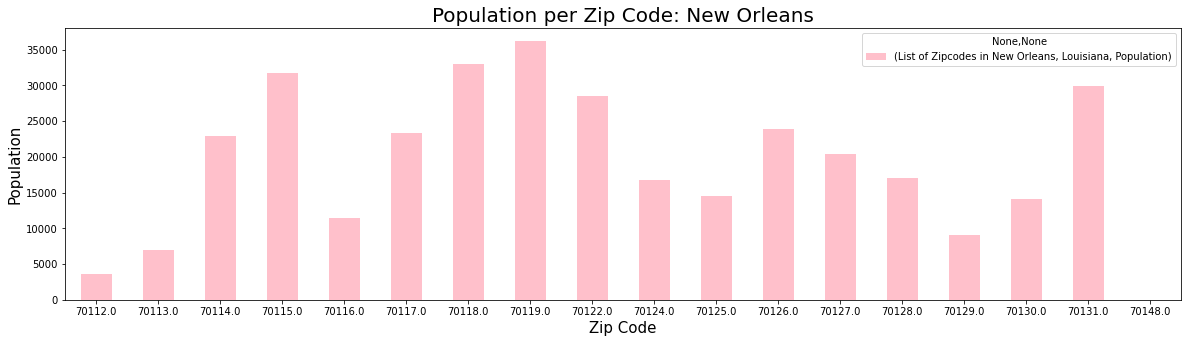

In [309]:
clr = "pink"
df_zipcode.plot.bar(x= ('List of Zipcodes in New Orleans, Louisiana', 'Zip'), figsize=(20,5), color=clr)
plt.title('Population per Zip Code: New Orleans', fontsize = 20)
plt.xlabel('Zip Code', fontsize = 15)
plt.ylabel('Population',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

According to the bar chart, the most populous area zip codes are 70115, 70118, 70119, 70122 and 70131

Load the coordinates of neighborhoods of New Orleans

In [35]:
url3 = 'https://en.wikipedia.org/wiki/Neighborhoods_in_New_Orleans'

In [36]:
df_coordinates = pd.read_html(url3)

In [37]:
len(df_coordinates)

2

In [38]:
df_coordinates[0]

,Neighborhood,Longitude,Latitude
0,U.S. NAVAL BASE,-90.026093,29.946085
1,ALGIERS POINT,-90.051606,29.952462
2,WHITNEY,-90.042357,29.947200
3,AUDUBON,-90.121450,29.932994
4,OLD AURORA,-90.000000,29.924440
5,B. W. COOPER,-90.091753,29.951774
6,BAYOU ST. JOHN,-90.086517,29.976071
7,BEHRMAN,-90.026436,29.934817
8,BLACK PEARL,-90.134883,29.935895
9,BROADMOOR,-90.103812,29.946568


In [39]:
df_coordinates[0].shape

(72, 3)

There are 71 neighborhoods in New Orleans according to this Wikipedia source.

#### Four Square API is used to get nearby venues

In [310]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
NOLA_neighborhoods = df_coordinates[0]
NOLA_neighborhoods.head()

,Neighborhood,Longitude,Latitude
0,U.S. NAVAL BASE,-90.026093,29.946085
1,ALGIERS POINT,-90.051606,29.952462
2,WHITNEY,-90.042357,29.947200
3,AUDUBON,-90.121450,29.932994
4,OLD AURORA,-90.000000,29.924440


In [42]:
# Get all of the Venues
NOLA_venues = getNearbyVenues(names=NOLA_neighborhoods['Neighborhood'],
                                   latitudes=NOLA_neighborhoods['Latitude'],
                                   longitudes=NOLA_neighborhoods['Longitude']
                                  )

U.S. NAVAL BASE
ALGIERS POINT
WHITNEY
AUDUBON
OLD AURORA
B. W. COOPER
BAYOU ST. JOHN
BEHRMAN
BLACK PEARL
BROADMOOR
MARLYVILLE - FONTAINEBLEAU
GERT TOWN
MID-CITY
ST. CLAUDE
CENTRAL BUSINESS DISTRICT
FRENCH QUARTER
CENTRAL CITY
LAKE CATHERINE
VILLAGE DE LEST
VIAVANT - VENETIAN ISLES
NEW AURORA - ENGLISH TURN
TALL TIMBERS - BRECHTEL
FISCHER DEV
McDONOGH
LOWER GARDEN DISTRICT
ST. THOMAS DEV
EAST RIVERSIDE
IRISH CHANNEL
TOURO
MILAN
UPTOWN
WEST RIVERSIDE
EAST CARROLLTON
FRERET
GARDEN DISTRICT
LEONIDAS
HOLLYGROVE
TULANE - GRAVIER
TREME - LAFITTE
SEVENTH WARD
MARIGNY
ST. ROCH
DIXON
LAKEWOOD
NAVARRE
CITY PARK
LAKEVIEW
WEST END
LAKESHORE - LAKE VISTA
FILMORE
ST. BERNARD AREA
DILLARD
ST. ANTHONY
LAKE TERRACE & OAKS
MILNEBURG
PONTCHARTRAIN PARK
GENTILLY WOODS
GENTILLY TERRACE
DESIRE AREA
FLORIDA AREA
FLORIDA DEV
LOWER NINTH WARD
BYWATER
HOLY CROSS
PINES VILLAGE
PLUM ORCHARD
READ BLVD WEST
READ BLVD EAST
WEST LAKE FOREST
LITTLE WOODS
FAIRGROUNDS
IBERVILLE


Check the size of the resulting dataframe:

In [43]:
print(NOLA_venues.shape)

(906, 7)


Lets see how many venues were returned for each neighbourhood

In [44]:
NOLA_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
ALGIERS POINT,23,23,23,23,23,23
AUDUBON,10,10,10,10,10,10
B. W. COOPER,4,4,4,4,4,4
BAYOU ST. JOHN,8,8,8,8,8,8
BLACK PEARL,4,4,4,4,4,4
BROADMOOR,5,5,5,5,5,5
BYWATER,16,16,16,16,16,16
CENTRAL BUSINESS DISTRICT,100,100,100,100,100,100
CENTRAL CITY,8,8,8,8,8,8


In [45]:
NOLA_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,U.S. NAVAL BASE,29.946085,-90.026093,The Mighty Missisippi,29.949695,-90.023710,Boat or Ferry
1,ALGIERS POINT,29.952462,-90.051606,Tout de Suite Café,29.952121,-90.051090,Café
2,ALGIERS POINT,29.952462,-90.051606,Congregation Coffee Roasters,29.951918,-90.053395,Coffee Shop
3,ALGIERS POINT,29.952462,-90.051606,The Crown & Anchor,29.951416,-90.054220,Bar
4,ALGIERS POINT,29.952462,-90.051606,Levee @ Algiers Point,29.951760,-90.048747,Scenic Lookout
5,ALGIERS POINT,29.952462,-90.051606,Old Point Bar,29.954940,-90.050226,Bar
6,ALGIERS POINT,29.952462,-90.051606,The Dry Dock Cafe & Bar,29.952053,-90.054769,Bar
7,ALGIERS POINT,29.952462,-90.051606,Wednesdays on the Point,29.954159,-90.054473,Music Venue
8,ALGIERS POINT,29.952462,-90.051606,Tavolino Pizza & Lounge,29.952053,-90.054597,Pizza Place
9,ALGIERS POINT,29.952462,-90.051606,Rosetree Blown Glass Studio,29.951072,-90.048804,Arts & Crafts Store


Let's find out how many unique categories can be curated from all the returned venues

In [46]:
categories = list(NOLA_venues['Venue Category'].unique())
print(categories)
print('There are {} uniques categories.'.format(len(NOLA_venues['Venue Category'].unique())))

['Boat or Ferry', 'Café', 'Coffee Shop', 'Bar', 'Scenic Lookout', 'Music Venue', 'Pizza Place', 'Arts & Crafts Store', 'Park', 'Music Store', 'Grocery Store', 'Food & Drink Shop', 'New American Restaurant', 'Neighborhood', 'Historic Site', 'Recording Studio', 'Construction & Landscaping', 'Wings Joint', 'Nightclub', 'Plaza', 'Outdoors & Recreation', 'College Arts Building', 'Smoothie Shop', 'Sandwich Place', 'Concert Hall', 'Convenience Store', 'Nightlife Spot', 'Playground', 'Food Truck', 'Gym / Fitness Center', 'Recreation Center', 'Boxing Gym', 'Lounge', 'Other Great Outdoors', 'Gas Station', 'Furniture / Home Store', 'Farmers Market', 'Taco Place', 'Cocktail Bar', 'Campground', 'Asian Restaurant', 'Bakery', 'Seafood Restaurant', 'Rental Service', 'Financial or Legal Service', 'Mediterranean Restaurant', 'Pub', 'Mexican Restaurant', 'Cajun / Creole Restaurant', 'American Restaurant', 'Spa', 'Hotel', 'Caribbean Restaurant', 'Bed & Breakfast', 'Bistro', 'French Restaurant', 'Hostel', 

Now let's add restaurants to our unique venue category list

In [47]:
nola_restaurants = ['Café', 'Coffee Shop', 'Bar', 'Pizza Place', 'Cupcake Shop', 'New American Restaurant', 'Wings Joint', 'Smoothie Shop', 'Sandwich Place', 'Taco Place', 'Food & Drink Shop', 'Asian Restaurant', 'Bakery', 'Seafood Restaurant', 'Mediterranean Restaurant', 'Cajun / Creole Restaurant', 'Mexican Restaurant', 'American Restaurant', 'Caribbean Restaurant', 'Bed & Breakfast', 'Bistro', 'French Restaurant', 'Breakfast Spot', 'Burger Joint', 'Italian Restaurant', 'Salad Place', 'Vietnamese Restaurant', 'Ice Cream Shop', 'Restaurant', 'Sushi Restaurant', 'Steakhouse', 'Food Court', 'BBQ Joint', 'Sports Bar', 'Hawaiian Restaurant', 'Thai Restaurant', 'Soup Place', 'Deli / Bodega', 'Eastern European Restaurant', 'Gastropub', 'Wine Bar', 'Southern / Soul Food Restaurant', 'Fried Chicken Joint', 'Fast Food Restaurant', 'Chinese Restaurant', 'Middle Eastern Restaurant', 'Tapas Restaurant', 'Indian Restaurant', 'Ethiopian Restaurant', 'Gourmet Shop', 'Cheese Shop', 'Dessert Shop', 'Spanish Restaurant', 'Bagel Shop', 'Hot Dog Joint', 'Halal Restaurant', 'Japanese Restaurant', 'Burrito Place', 'Comfort Food Restaurant', 'Food', 'Cafeteria', 'Donut Shop', 'Snack Place', 'Vegetarian / Vegan Restaurant', 'Tex-Mex Restaurant']

In [48]:
df_nola_restaurants = pd.DataFrame(nola_restaurants)

In [49]:
df_nola_restaurants = df_nola_restaurants.rename(columns={0:'Venue Category'})

In [50]:
df_rest_merge = pd.merge(NOLA_venues, df_nola_restaurants, on='Venue Category')

In [51]:
df_rest_merge

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALGIERS POINT,29.952462,-90.051606,Tout de Suite Café,29.952121,-90.051090,Café
1,CENTRAL BUSINESS DISTRICT,29.950026,-90.074458,Café Bon Ami,29.950671,-90.072060,Café
2,CENTRAL BUSINESS DISTRICT,29.950026,-90.074458,Two Chicks Cafe CBD,29.952642,-90.072862,Café
3,CENTRAL BUSINESS DISTRICT,29.950026,-90.074458,Cafe at the Square,29.949097,-90.070738,Café
4,CENTRAL BUSINESS DISTRICT,29.950026,-90.074458,Merchant,29.952847,-90.071265,Café
5,FRENCH QUARTER,29.958839,-90.064373,Café du Monde,29.957510,-90.062056,Café
6,FRENCH QUARTER,29.958839,-90.064373,Cafe Beignet,29.955891,-90.063430,Café
7,FRENCH QUARTER,29.958839,-90.064373,Vacherie Cafe,29.958415,-90.067066,Café
8,FRENCH QUARTER,29.958839,-90.064373,Croissant d'Or Patisserie,29.960898,-90.061417,Café
9,McDONOGH,29.943407,-90.051413,Georgia's,29.942970,-90.051995,Café


In [52]:
df_rest_merge.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
ALGIERS POINT,9,9,9,9,9,9
AUDUBON,3,3,3,3,3,3
BAYOU ST. JOHN,1,1,1,1,1,1
BROADMOOR,2,2,2,2,2,2
BYWATER,6,6,6,6,6,6
CENTRAL BUSINESS DISTRICT,52,52,52,52,52,52
CENTRAL CITY,4,4,4,4,4,4
DILLARD,1,1,1,1,1,1
DIXON,3,3,3,3,3,3


Analyze each neighbourhood

In [53]:
# one hot encoding
NOLA_onehot = pd.get_dummies(df_rest_merge[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NOLA_onehot['Neighbourhood'] = df_rest_merge['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [NOLA_onehot.columns[-1]] + list(NOLA_onehot.columns[:-1])
NOLA_onehot = NOLA_onehot[fixed_columns]

NOLA_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Deli / Bodega,Dessert Shop,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Gastropub,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Pizza Place,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CENTRAL BUSINESS DISTRICT,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CENTRAL BUSINESS DISTRICT,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CENTRAL BUSINESS DISTRICT,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CENTRAL BUSINESS DISTRICT,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Examine the new dataframe size

In [54]:
NOLA_onehot.shape

(402, 63)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [55]:
#Analyze each neighbourhood



NOLA_grouped = NOLA_onehot.groupby('Neighbourhood').mean().reset_index()


NOLA_grouped.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Bistro,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,Deli / Bodega,Dessert Shop,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Gastropub,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Pizza Place,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,ALGIERS POINT,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111
1,AUDUBON,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,BAYOU ST. JOHN,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,BROADMOOR,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,BYWATER,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000


Check the new dataframe size

In [56]:
NOLA_grouped.shape

(49, 63)

Now let's print each neighborhood with the top 5 restaurant/eatery venues

In [57]:
num_top_venue_categories = 5

for hood in NOLA_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = NOLA_grouped[NOLA_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venue_categories))
    print('\n')

----ALGIERS POINT----
      venue category  freq
0                Bar  0.33
1        Wings Joint  0.11
2  Food & Drink Shop  0.11
3               Café  0.11
4        Pizza Place  0.11


----AUDUBON----
       venue category  freq
0       Smoothie Shop  0.33
1      Sandwich Place  0.33
2         Coffee Shop  0.33
3  Seafood Restaurant  0.00
4      Ice Cream Shop  0.00


----BAYOU ST. JOHN----
        venue category  freq
0       Sandwich Place   1.0
1  American Restaurant   0.0
2   Seafood Restaurant   0.0
3        Hot Dog Joint   0.0
4       Ice Cream Shop   0.0


----BROADMOOR----
        venue category  freq
0           Taco Place   0.5
1          Coffee Shop   0.5
2  American Restaurant   0.0
3   Seafood Restaurant   0.0
4       Ice Cream Shop   0.0


----BYWATER----
                  venue category  freq
0                    Coffee Shop  0.33
1             Seafood Restaurant  0.17
2            Fried Chicken Joint  0.17
3  Vegetarian / Vegan Restaurant  0.17
4           Caribbean Re

Put into a data frame

In [58]:
def return_most_common_venues_categories(row, num_top_venue_categories):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venue_categories]

In [59]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurant venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venue_categories):
    try:
        columns.append('{}{} Most Common Restaurant Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant Category'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = NOLA_grouped['Neighbourhood']

for ind in np.arange(NOLA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues_categories(NOLA_grouped.iloc[ind, :], num_top_venue_categories)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Restaurant Category,2nd Most Common Restaurant Category,3rd Most Common Restaurant Category,4th Most Common Restaurant Category,5th Most Common Restaurant Category
0,ALGIERS POINT,Bar,Wings Joint,Pizza Place,New American Restaurant,Café
1,AUDUBON,Sandwich Place,Coffee Shop,Smoothie Shop,Caribbean Restaurant,Food Court
2,BAYOU ST. JOHN,Sandwich Place,Wings Joint,Food Court,Food & Drink Shop,Food
3,BROADMOOR,Taco Place,Coffee Shop,Wings Joint,Caribbean Restaurant,Food Court
4,BYWATER,Coffee Shop,Caribbean Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant


#### Choose Optimal K Clusters with The “Elbow” Method
#### In the elbow method, the sum of squares at each number of clusters is calculated and graphed, and the user looks for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters.

Lets build the clustering model and calculate the values of the Distortion and Inertia


In [138]:
from scipy.spatial.distance import cdist 
distortions = []
inertias = []
mapping1 = {} 
mapping2 = {} 
NOLA_grouped_clustering = NOLA_grouped.drop('Neighbourhood', 1)


K1 = range(1,10)
for k1 in K1: #build and fit the model
    kmean1 = KMeans(n_clusters=k1).fit(NOLA_grouped_clustering)
    kmean1.fit(NOLA_grouped_clustering)
    distortions.append(sum(np.min(cdist(NOLA_grouped_clustering, kmean1.cluster_centers_, 
                      'euclidean'),axis=1)) / NOLA_grouped_clustering.shape[0]) 
    inertias.append(kmean1.inertia_) 
  
    mapping1[k1] = sum(np.min(cdist(NOLA_grouped_clustering, kmean1.cluster_centers_, 
                 'euclidean'),axis=1)) / NOLA_grouped_clustering.shape[0] 
    mapping2[k1] = kmean1.inertia_ 

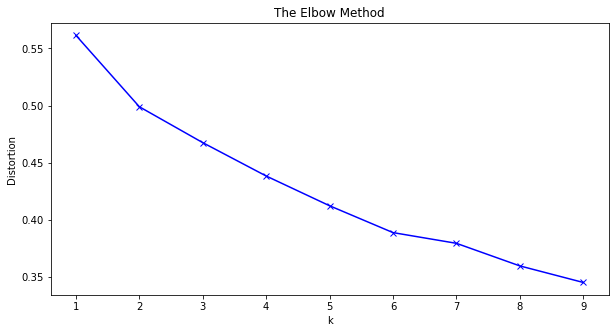

In [139]:
plt.figure(figsize=(10,5))
plt.plot(K1, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

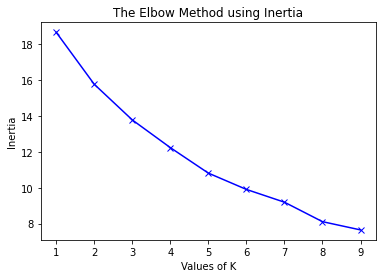

In [140]:
plt.plot(K1, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

According to the elbow method, we can choose any number of clusters from 6 to 9

Let's choose 7 as number of clusters

In [143]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NOLA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [166]:
# create columns according to number of top restaurant venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venue_categories):
    try:
        columns.append('{}{} Most Common Restaurant Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant Category'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = NOLA_grouped['Neighbourhood']

for ind in np.arange(NOLA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues_categories(NOLA_grouped.iloc[ind, :], num_top_venue_categories)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Restaurant Category,2nd Most Common Restaurant Category,3rd Most Common Restaurant Category,4th Most Common Restaurant Category,5th Most Common Restaurant Category
0,ALGIERS POINT,Bar,Wings Joint,Pizza Place,New American Restaurant,Café
1,AUDUBON,Sandwich Place,Coffee Shop,Smoothie Shop,Caribbean Restaurant,Food Court
2,BAYOU ST. JOHN,Sandwich Place,Wings Joint,Food Court,Food & Drink Shop,Food
3,BROADMOOR,Taco Place,Coffee Shop,Wings Joint,Caribbean Restaurant,Food Court
4,BYWATER,Coffee Shop,Caribbean Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Seafood Restaurant


In [167]:
df_neighbourhoods = NOLA_neighborhoods.rename(columns={'Neighborhood': 'Neighbourhood'}) #make sure common column names are same

In [171]:
# merge the New Orleans data with neighborhood cooridinates data

NOLA_labels = pd.merge(df_neighbourhoods,NOLA_grouped, on='Neighbourhood')
NOLA_labels = NOLA_labels.drop(columns=['Café', 'Coffee Shop', 'Bar', 'Pizza Place', 'New American Restaurant', 'Wings Joint', 'Smoothie Shop', 'Sandwich Place', 'Taco Place', 'Food & Drink Shop', 'Asian Restaurant', 'Bakery', 'Seafood Restaurant', 'Mediterranean Restaurant', 'Cajun / Creole Restaurant', 'Mexican Restaurant', 'American Restaurant', 'Caribbean Restaurant', 'Bed & Breakfast', 'Bistro', 'French Restaurant', 'Breakfast Spot', 'Burger Joint', 'Italian Restaurant', 'Salad Place', 'Vietnamese Restaurant', 'Ice Cream Shop', 'Restaurant', 'Sushi Restaurant', 'Steakhouse', 'Food Court', 'BBQ Joint', 'Sports Bar', 'Hawaiian Restaurant', 'Thai Restaurant', 'Soup Place', 'Deli / Bodega', 'Eastern European Restaurant', 'Gastropub', 'Wine Bar', 'Southern / Soul Food Restaurant', 'Fried Chicken Joint', 'Fast Food Restaurant', 'Chinese Restaurant', 'Middle Eastern Restaurant', 'Tapas Restaurant', 'Indian Restaurant', 'Ethiopian Restaurant', 'Cheese Shop', 'Dessert Shop', 'Spanish Restaurant', 'Bagel Shop', 'Hot Dog Joint', 'Halal Restaurant', 'Japanese Restaurant', 'Burrito Place', 'Comfort Food Restaurant', 'Food', 'Cafeteria', 'Donut Shop', 'Vegetarian / Vegan Restaurant', 'Tex-Mex Restaurant'])


NOLA_labels.head()

,Neighbourhood,Longitude,Latitude
0,ALGIERS POINT,-90.051606,29.952462
1,AUDUBON,-90.121450,29.932994
2,BAYOU ST. JOHN,-90.086517,29.976071
3,BROADMOOR,-90.103812,29.946568
4,MARLYVILLE - FONTAINEBLEAU,-90.113468,29.953001


Create a new dataframe with clusters as well as top 5 common restaurant venues

In [311]:
nola_merged = NOLA_labels

# add clustering labels
nola_merged['Cluster Labels'] = kmeans.labels_

nola_merged = nola_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

nola_merged.head() # check the last columns!

,Neighbourhood,Longitude,Latitude,Cluster Labels,1st Most Common Restaurant Category,2nd Most Common Restaurant Category,3rd Most Common Restaurant Category,4th Most Common Restaurant Category,5th Most Common Restaurant Category
0,ALGIERS POINT,-9,3,0,Bar,Wings Joint,Pizza Place,New American Restaurant,Café
1,AUDUBON,-9,3,0,Sandwich Place,Coffee Shop,Smoothie Shop,Caribbean Restaurant,Food Court
2,BAYOU ST. JOHN,-9,3,3,Sandwich Place,Wings Joint,Food Court,Food & Drink Shop,Food
3,BROADMOOR,-9,3,0,Taco Place,Coffee Shop,Wings Joint,Caribbean Restaurant,Food Court
4,MARLYVILLE - FONTAINEBLEAU,-9,3,0,Bar,Food & Drink Shop,Wings Joint,Cheese Shop,French Restaurant


In [193]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[ 2.50259441e-02,  1.40021269e-02,  6.20347395e-04,
         1.40252454e-03,  2.87893850e-02,  1.01193816e-01,
         1.16743472e-02,  3.22580645e-03,  3.78323290e-02,
         1.52917559e-02,  1.53609831e-03,  1.61290323e-02,
         4.39337817e-02,  3.54188822e-02,  1.07142857e-02,
         2.15053763e-03,  2.41167435e-02,  1.20689506e-01,
         3.22580645e-03,  5.22864233e-03,  3.55306218e-03,
         3.49462366e-02,  1.34408602e-03,  5.41394090e-03,
         1.04838710e-02,  1.88172043e-02,  1.01569577e-02,
         1.13730356e-02,  1.84783543e-02,  3.03379416e-02,
         4.09069659e-03,  1.40252454e-03,  6.20347395e-04,
         2.17057370e-03,  1.61157683e-02,  6.81646544e-03,
         4.31289141e-03,  1.40252454e-03,  5.82471526e-03,
         1.36440465e-02,  1.15959310e-02,  2.23497673e-02,
         1.84611360e-02,  1.97949900e-02,  6.20347395e-04,
         5.01686019e-02,  3.06185750e-02,  2.21257237e-02,
         6.20347395e-04,  1.65714954e-02,  4.83870968e-0

In [282]:
locations = nola_merged[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

49

In [266]:
lat = []
long = []
for l in locationlist:
  lat.append(l[0])
  long.append(l[1])

In [293]:
latitude1 = sum(lat)/len(lat) #calculate centroid by calculating mean of the coordinate values in the cluster
longitude2 = sum(long)/len(long)
print(latitude1)
print(longitude2)

29.970779391632654
-90.07265348897957


In [312]:
# Intstall opencage to reverse lookup the cooridinates
!pip install opencage
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

key = 'afd4ada5fce54951ab3676abb4595983'
geocoder = OpenCageGeocode(key)

best_loc = geocoder.reverse_geocode(latitude1, longitude2)
pprint(best_loc)

[{'annotations': {'DMS': {'lat': "29° 58' 15.17196'' N",
                          'lng': "90° 4' 22.03932'' W"},
                  'FIPS': {'county': '22071', 'state': '22'},
                  'MGRS': '15RYP8246719165',
                  'Maidenhead': 'EL49xx13ga',
                  'Mercator': {'x': -10026856.97, 'y': 3478465.498},
                  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=346639093#map=17/29.97088/-90.07279',
                          'note_url': 'https://www.openstreetmap.org/note/new#map=17/29.97088/-90.07279&layers=N',
                          'url': 'https://www.openstreetmap.org/?mlat=29.97088&mlon=-90.07279#map=17/29.97088/-90.07279'},
                  'UN_M49': {'regions': {'AMERICAS': '019',
                                         'NORTHERN_AMERICA': '021',
                                         'US': '840',
                                         'WORLD': '001'},
                             'statistical_groupings': ['MEDC']},
     

#### Results: The best neighbourhood to open a restaurant in New Orleans is Treme/Lafitte and the address is 1228 North Johnson Street, New Orleans, LA 70116, United States of America

#### Get coordinates of New Orleans

In [176]:
!pip install geopy
from geopy.geocoders import Nominatim

address = 'New Orleans, LA'

geolocator = Nominatim(user_agent="nola-coord")

In [177]:
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Orleans are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Orleans are 29.9499323, -90.0701156.


Visualize map of New Orleans

In [198]:
# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=12)
map_clusters1

#### Visualize resulting clusters

In [200]:
nola_merged['Cluster Labels'] = nola_merged['Cluster Labels'].astype(int)


In [296]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#add markers to the map
markers_colors= []
for cluster in range(0,kclusters): 
    for lat, lon, neigh, label in zip(nola_merged['Latitude'], nola_merged['Longitude'], nola_merged['Neighbourhood'], nola_merged['Cluster Labels']):
        if int(label) == cluster: 
            label = folium.Popup('ORIG. '+ str(poi) + 'Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.7).add_to(map_clusters)
            

  #Mark red circle around the coordinates we got from the resulting clusters            
    
folium.CircleMarker([latitude1, longitude2],
                    radius=60,
                    color='red',
                    ).add_to(map_clusters)



folium.map.LayerControl('topright', collapsed=False).add_to(map_clusters)
map_clusters.save(outfile= "map_clusters.html")
map_clusters

Add Marker Cluster to map

In [277]:
map = folium.Map(location=[latitude, longitude], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=nola_merged['Neighbourhood'][point]).add_to(map)

In [278]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map)
map

Lets put a circle around the neighbourhood that has the most dense cluster

In [297]:
folium.CircleMarker([29.9708811, -90.0727887], 
                    radius=50,
                    color='red',
                    ).add_to(map)

map

According to our results Treme/Lafitte is the best neighborhood to open up a traditional restaurant. One of the neighborhoods adjacent to Treme/Lafitte is 
French Quarter which is the heart of New Orleans. 
According to the top venues per neighborhood, Treme/Lafitte mostly has Southern / Soul Food Restaurants. It also has wings joints, bars, cajun/creole
restaurants as well as coffee shops.

Our main goal was to open up a traditional restaurant that speaks to New Orleans culture as well as caters to tourists who come solely to enjoy 
New Orleans food. It is best to open a restaurant with a Southern theme to it that offers creole/ cajun food which is what New Orleans is known
for.